In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from joblib import Parallel, delayed
from tqdm import tqdm

# Изучить особенности данных:
### Рассчитать основные статистики для вещественных и категориальных признаков (df.describe(include=’all’))


In [4]:
df = pd.read_csv('smiles_physchem_descriptors.csv')
df.shape

(339061, 107)

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339061 entries, 0 to 339060
Columns: 107 entries, smiles to VSA_EState9
dtypes: float64(106), object(1)
memory usage: 276.8+ MB


,smiles,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,...,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9
0,CC(=O)OCC[N+](C)(C)C,1.884911,-2.373581,3.290618,115.264739,8.198671,7.177924,7.177924,4.416502,3.354792,...,5.590000,0.000000,10.300428,0.000000,0.000000,-0.200509,0.000000,0.000000,2.799676,6.177072
1,C[N+](C)(C)CC(=O)[O-],1.844465,-2.445326,3.551253,93.092017,6.784457,5.470817,5.470817,3.416502,2.419670,...,0.418981,0.000000,9.888194,9.888194,0.000000,-1.002315,0.000000,0.000000,0.069444,5.404167
2,O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Cl)Cl,2.203149,-2.435885,2.821158,480.206758,15.284093,10.070873,11.582731,9.362280,5.482716,...,0.000000,10.701515,19.911925,31.946182,0.169222,-0.756162,4.053667,-1.252928,-0.551198,0.000000
3,O=C(O)c1ccccc1O,2.138185,-1.945909,3.152941,254.783061,7.560478,5.112077,5.112077,4.715214,2.728688,...,0.000000,0.000000,10.261759,17.305741,-0.067130,-1.311944,5.811574,0.000000,0.000000,0.000000
4,CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1,2.130846,-2.455588,2.784739,381.764138,12.344935,10.172964,10.928893,7.293512,5.369174,...,0.000000,5.854074,12.053441,3.835666,0.574026,0.067060,6.831265,0.000000,7.978912,0.000000


In [26]:
stat = df.describe(include='all')
stat.to_csv('basic statistics.csv')
stat

,smiles,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,...,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9
count,339061,338790.000000,338790.000000,339061.000000,339061.000000,339061.000000,339061.000000,339061.000000,339061.000000,339061.000000,...,339061.000000,339061.000000,339061.000000,339061.000000,339061.000000,339061.000000,339061.000000,339061.000000,339061.000000,339061.000000
unique,339061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CC(=O)OCC[N+](C)(C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.269839,-2.301297,1.868844,836.360460,17.846611,14.027871,14.686668,12.007916,8.084797,...,13.688260,1.968485,19.977158,7.206169,2.243957,0.109151,10.442595,1.886729,2.893856,0.102354
std,NaN,0.116467,0.176970,0.434242,317.254336,4.967105,4.004067,4.043766,3.350623,2.434139,...,15.254773,3.322344,14.022380,7.704164,2.464991,1.651824,5.782849,2.882790,2.782318,2.036691
min,NaN,-2.996000,-3.668805,-0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.544753,-40.877434,-14.322623,-17.939047,-38.571020,-152.200274,-106.849663,-88.580228,-128.294945,-51.457664
25%,NaN,2.203750,-2.425490,1.586906,641.866935,14.982763,11.685508,12.338928,10.092224,6.635235,...,2.090946,0.000000,12.079992,2.693778,0.754262,-0.439650,6.488669,0.000000,0.534027,0.000000
50%,NaN,2.266723,-2.319629,1.796612,825.292917,17.742276,13.922518,14.593436,11.969234,8.006134,...,7.584633,0.000000,17.764173,5.126844,1.711200,0.005219,10.099774,1.470551,2.237084,0.000000
75%,NaN,2.328643,-2.185446,2.060465,1017.813488,20.543241,16.237014,16.940889,13.895414,9.434380,...,21.190820,2.858275,27.008004,10.850079,3.125530,0.760105,14.230580,3.226955,4.358636,1.380853


In [27]:

df.isnull().sum().sort_values(ascending=False) 

BCUT2D_LOGPHI     271
BCUT2D_LOGPLOW    271
PEOE_VSA2           0
SMR_VSA2            0
SMR_VSA10           0
                 ... 
Kappa1              0
HeavyAtomMolWt      0
HeavyAtomCount      0
HallKierAlpha       0
VSA_EState9         0
Length: 107, dtype: int64

### Есть ли пропущенные значения. Сколько. Какова их доля от общего числа объектов для каждого конкретного признака. И, в целом, насколько ваш датасет “разрежен” в контексте пропущенных значений. Выдвинуть и (желательно) проверить гипотезу, что могут означать пропущенные значения? Осмысленно и аргументированно обработать пропуски.

BCUT2D_LOGPHI, BCUT2D_LOGPLOW - 271 пропуск (Статистические индексы на основе матрицы расстояний и свойств атомов) - 0.08%
Пропуски могли возникнуть из-за ошибок парсинга молекул или нестрандартной структуры smiles. 
Думаю можно удалить строки так как процентр пропусков незначительный. 

In [28]:
df = df.dropna() # удалю строки 
df.shape

(338790, 107)

### Есть ли ошибочные  (например, отрицательный возраст или пятиметровый рост человека; 3-й класс в задаче бинарной классификации) значения (признаки, целевая переменная) в данных. Обработать их.


In [29]:
# Среди десксриптеров есть счетчики. Проверим на отрицательные значения
counters = [i for i in df.columns if 'Num' in i or 'Count' in i]
(df[counters] < 0).sum().sort_values(ascending=False)
# отрицательный счетчиков нет

HeavyAtomCount                     0
NumHeteroatoms                     0
NumValenceElectrons                0
NumUnspecifiedAtomStereoCenters    0
NumSpiroAtoms                      0
NumSaturatedRings                  0
NumSaturatedHeterocycles           0
NumSaturatedCarbocycles            0
NumRotatableBonds                  0
NumRadicalElectrons                0
NumHeterocycles                    0
NumHDonors                         0
NumAliphaticCarbocycles            0
NumHAcceptors                      0
NumBridgeheadAtoms                 0
NumAtomStereoCenters               0
NumAromaticRings                   0
NumAromaticHeterocycles            0
NumAromaticCarbocycles             0
NumAmideBonds                      0
NumAliphaticRings                  0
NumAliphaticHeterocycles           0
RingCount                          0
dtype: int64

In [30]:
# Среди десксриптеров есть весовые характеристики. Проверим на отрицательные значения
# 'MolWt' - молекулярный вес
# 'ExactMolWt' - точная молекулярная масса
# 'LabuteASA' - площадь доступной поверхности
# 'TPSA' - полярная поверхность
mass = ['MolWt', 'ExactMolWt', 'LabuteASA', 'TPSA']
(df[mass] < 0).sum().sort_values(ascending=False)
# отрицательный счетчиков нет
# все остальные харакетеристики могут принимать различные значения

MolWt         0
ExactMolWt    0
LabuteASA     0
TPSA          0
dtype: int64

### Есть ли выбросы в данных? По возможности обработать их.
Есть молекулы болльших размеров ExactMolWt max  = 7152 mean 357 <br> 
Молекулы с большой площадью поверзности LabuteASA 2863 max mean 148  <br> 
Выбросы в колонках с кол-вом акцепторов, доноров, аминных соединений, ароматичсеких колец и тд. <br> 
Вполне отвечает реальным значениям больших химических в-в. 
  

# Изучить поведение каждого признака в отдельности, его связь с целевой переменной, а также попарные корреляции (в т.ч и в особенности с таргетом). Визуализировать попарные распределения признаков (sns.pairplot()) и корреляции наиболее значимых. Построить подходящие сводные таблицы и прочие диаграммы.


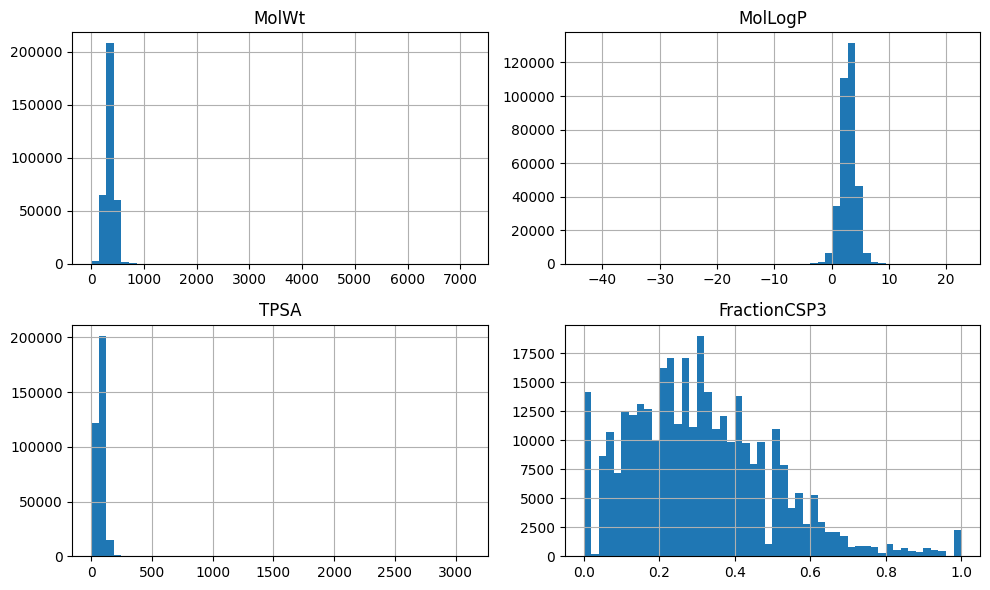

In [31]:
# Физико-химические дескрипторы
phys_chem = ["MolWt", # молекулрная масса
             "MolLogP", # липофильность
             "TPSA", # полярная поверхность
             "FractionCSP3" # доля sp3-углеродов (объемность, гибкость)
             ]
df[phys_chem].hist(bins=50, figsize=(10,6))
plt.tight_layout()
plt.show()

Есть относительно небольшое кол-во больших молекул с большой полярной структурой. Большое кол-во ароматических соединений

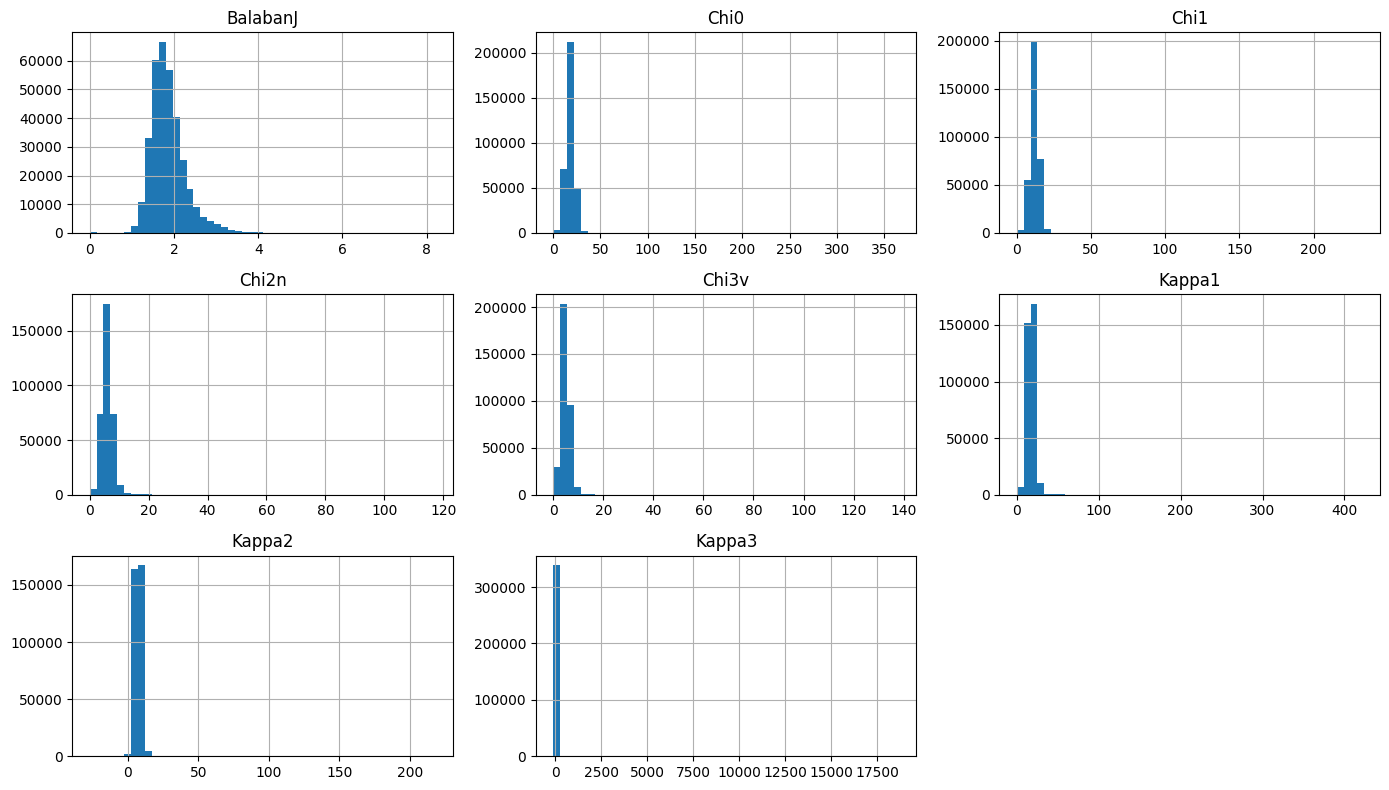

In [32]:
# топологические индексы связности
topo = ["BalabanJ", # мера сложности связей в молекуле
        "Chi0", "Chi1", "Chi2n", "Chi3v", # общaя архитектура молекулы (ветвление, циклы, плотность связей)
        "Kappa1", "Kappa2", "Kappa3" # про трехмерность и вытянутость молекулы.
        ]
df[topo].hist(bins=50, figsize=(14,8))
plt.tight_layout()
plt.show()


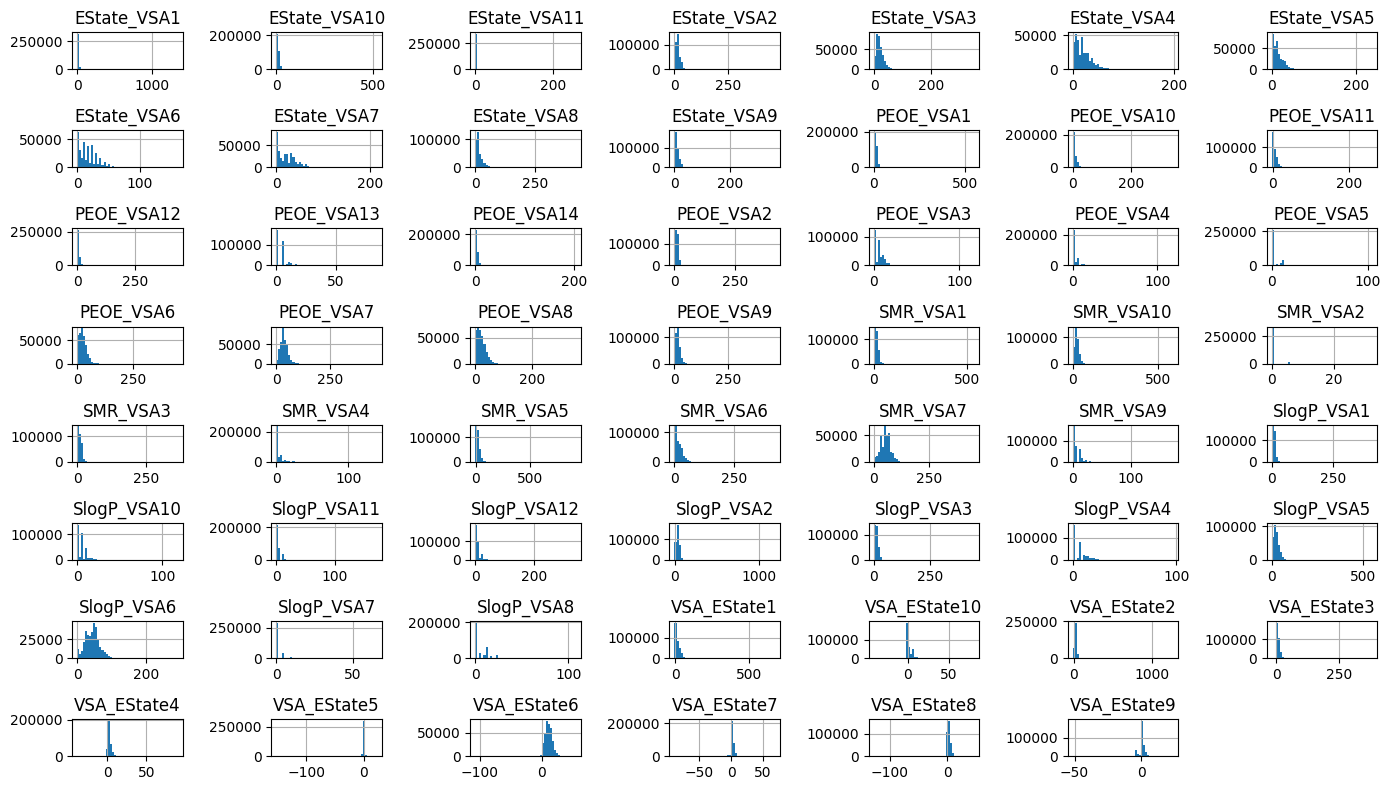

In [33]:
# VSA
vsa_cols = [c for c in df.columns if "VSA" in c] 
df[vsa_cols].hist(bins=50, figsize=(14,8))
plt.tight_layout()
plt.show()


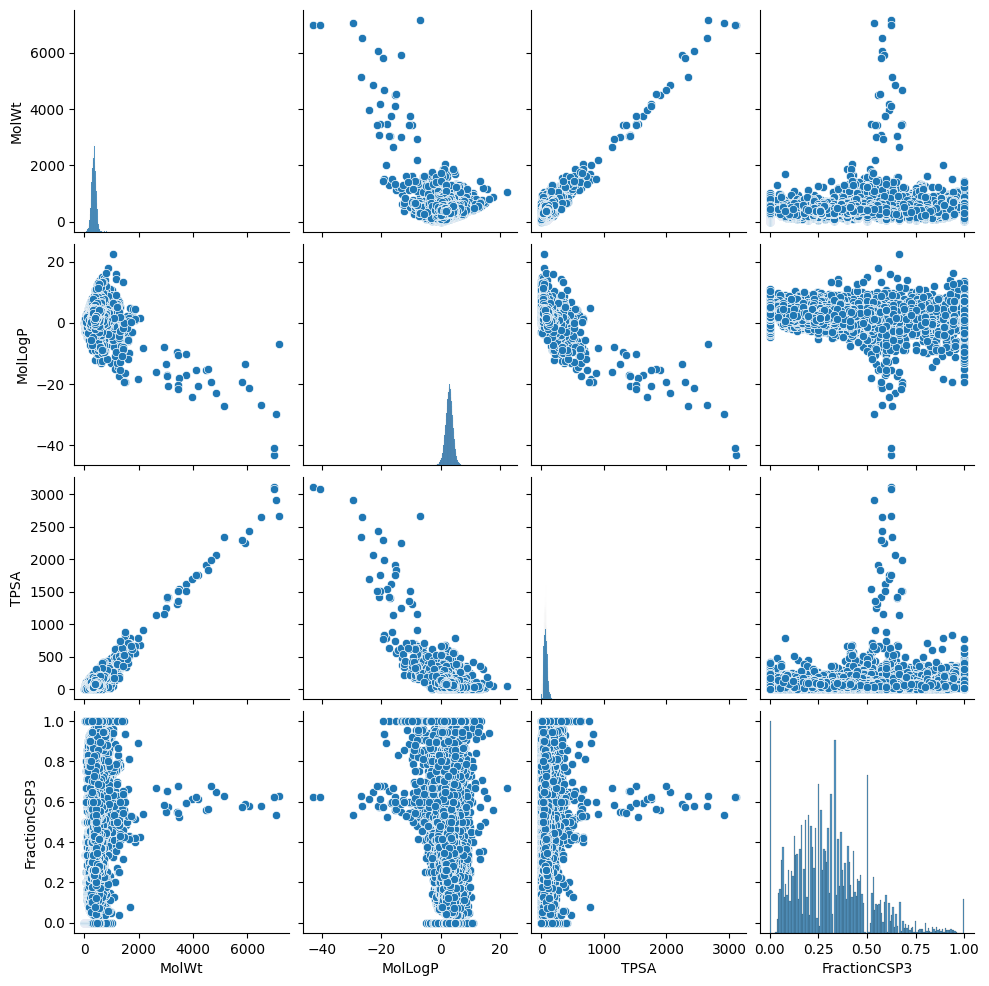

In [34]:
# Попарные распределения для Физико-химических дескрипторов
sns.pairplot(df[phys_chem])
plt.show()

In [35]:
print("Pearson:\n", df[phys_chem].corr())
print("Spearman:\n", df[phys_chem].corr(method='spearman'))


Pearson:
                  MolWt   MolLogP      TPSA  FractionCSP3
MolWt         1.000000  0.208176  0.663312      0.064437
MolLogP       0.208176  1.000000 -0.375346     -0.227913
TPSA          0.663312 -0.375346  1.000000     -0.022839
FractionCSP3  0.064437 -0.227913 -0.022839      1.000000
Spearman:
                  MolWt   MolLogP      TPSA  FractionCSP3
MolWt         1.000000  0.315898  0.522363      0.117908
MolLogP       0.315898  1.000000 -0.308522     -0.215567
TPSA          0.522363 -0.308522  1.000000     -0.037378
FractionCSP3  0.117908 -0.215567 -0.037378      1.000000


MolWt и TPSA дулируют друг друга. Чем выше масса тем больше полярная поверхность  <br>
При этом чем выше TPSA тем больше уменьшается липофильность MolLogP <br>
FractionCSP3 не имеет явной зависимоти от других переменных  <br>


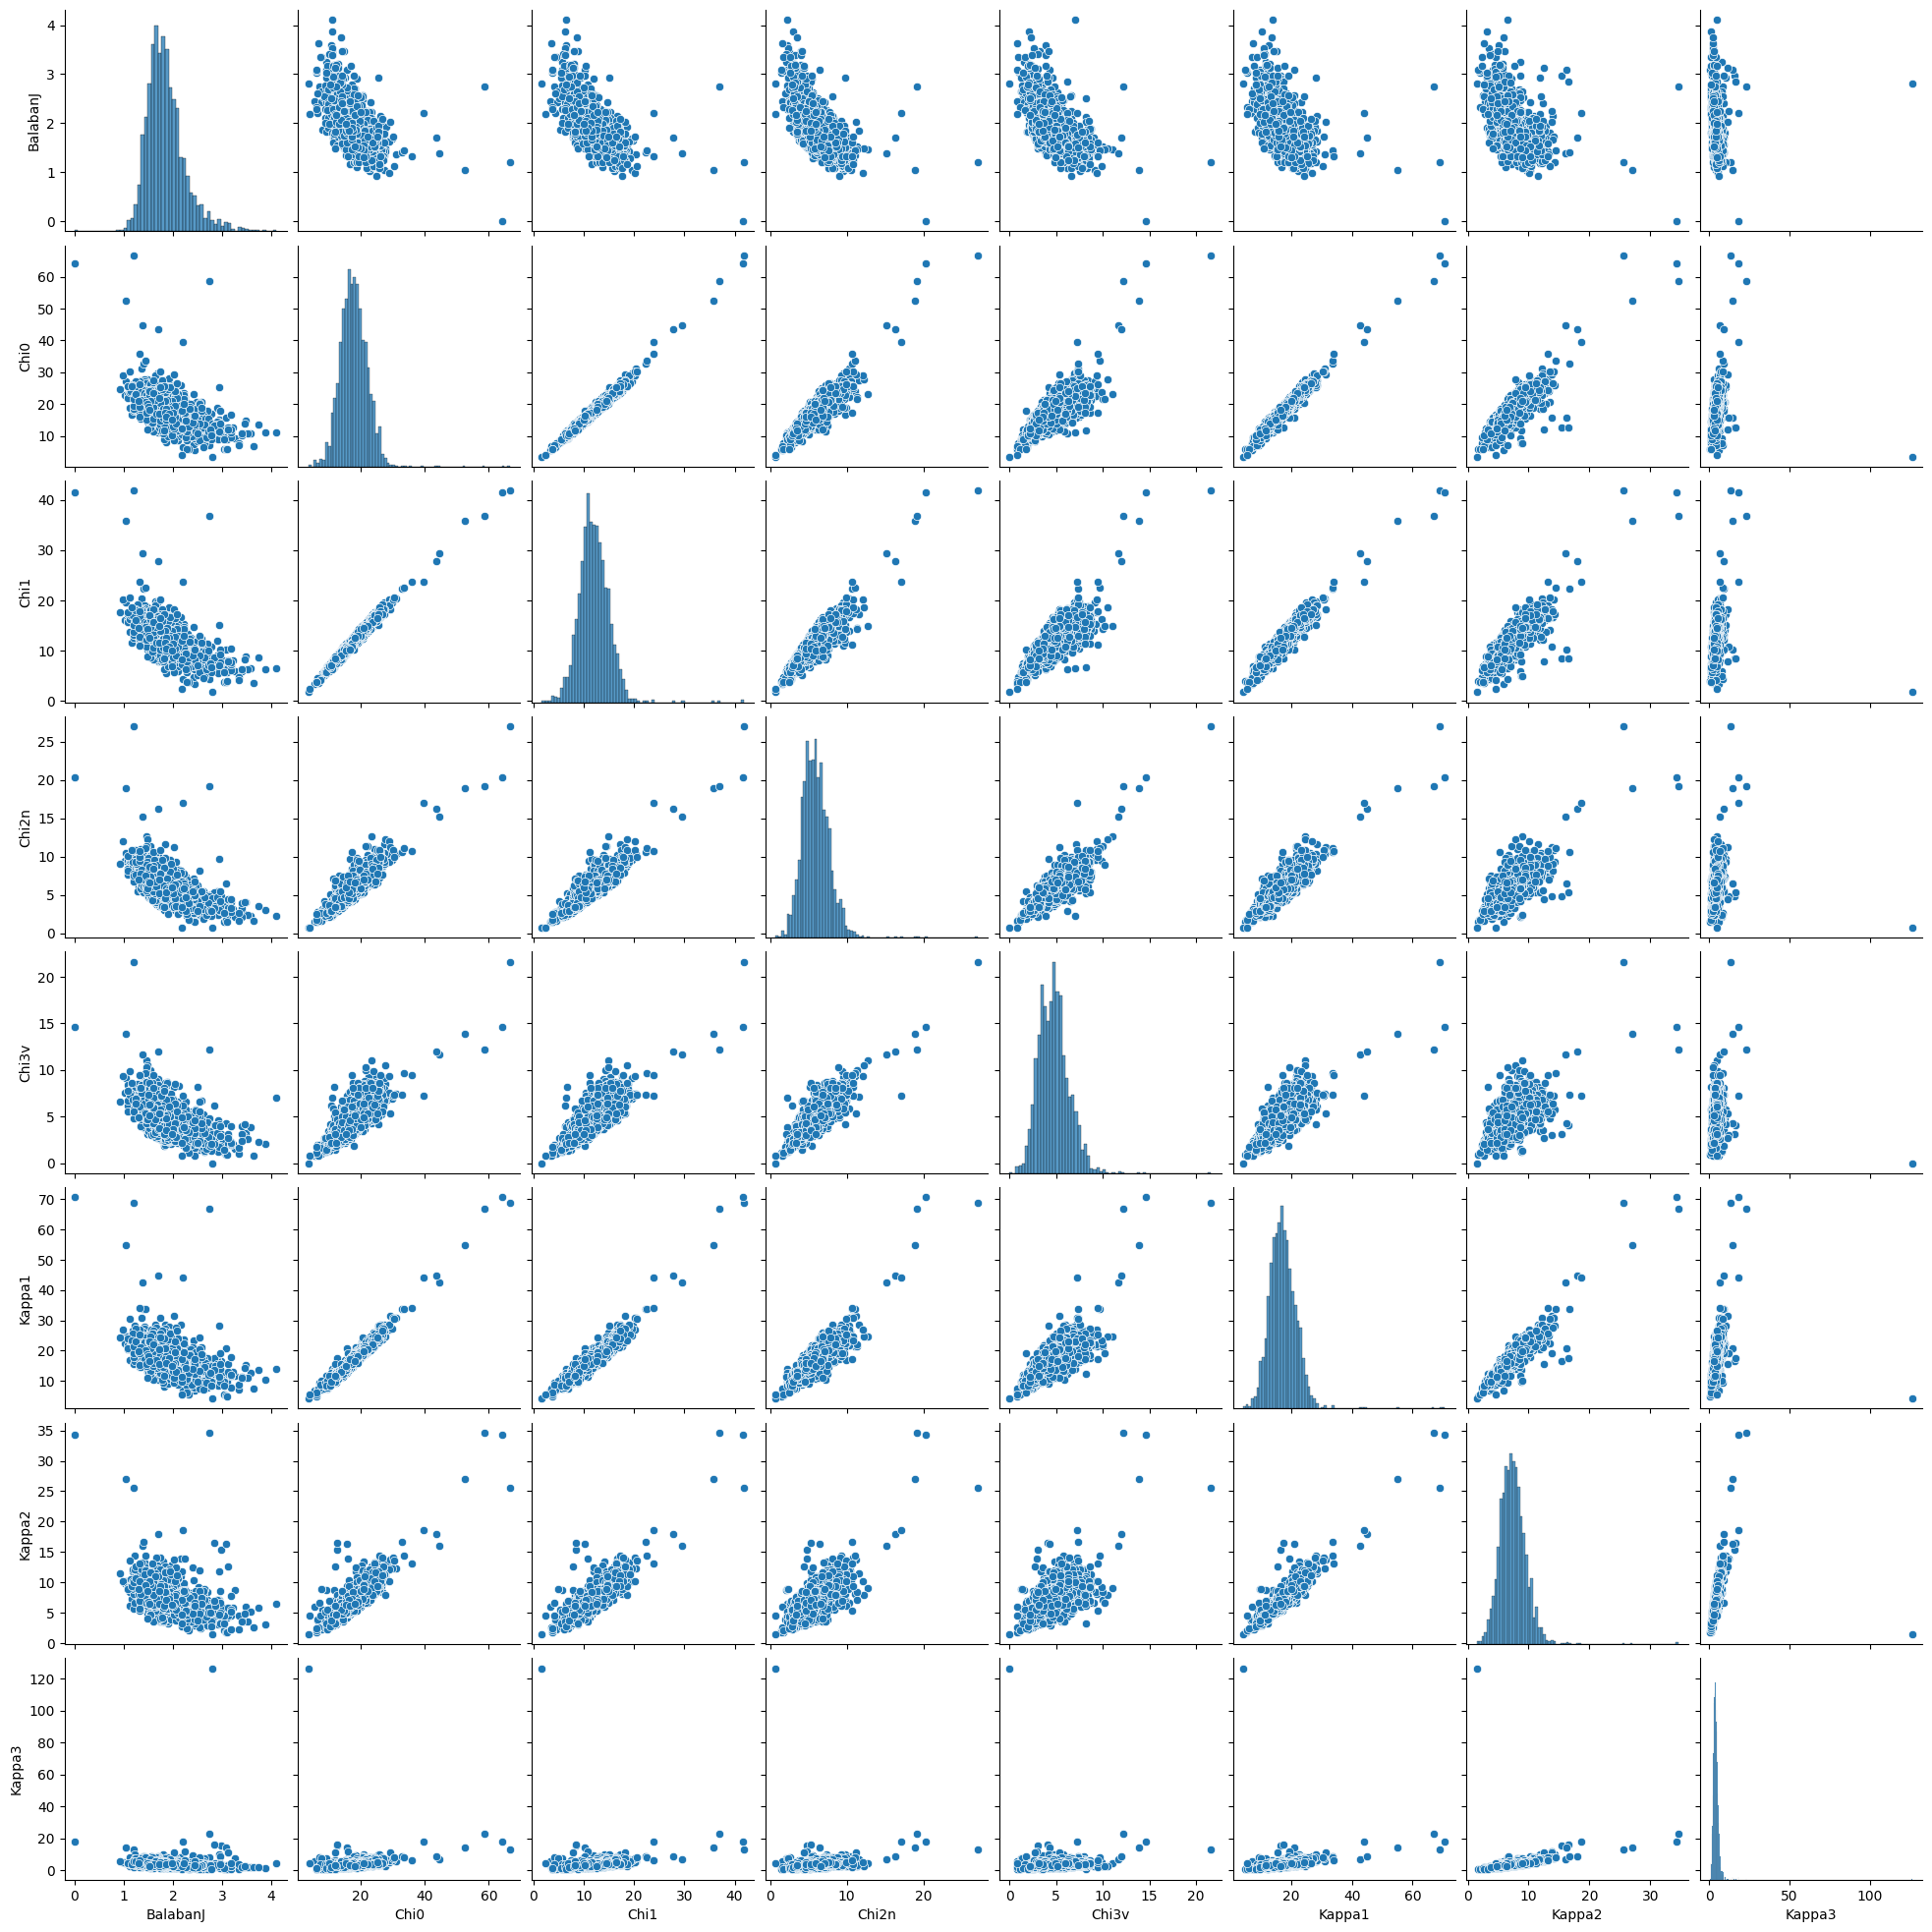

In [36]:
# Попарные распределения для топологических индексов связности
sns.pairplot(df[topo].sample(2000, random_state=42))
plt.show()

In [37]:
print("Pearson:\n", df[topo].corr())
print("Spearman:\n", df[topo].corr(method='spearman'))

Pearson:
           BalabanJ      Chi0      Chi1     Chi2n     Chi3v    Kappa1  \
BalabanJ  1.000000 -0.507492 -0.587047 -0.572432 -0.541689 -0.433999   
Chi0     -0.507492  1.000000  0.989438  0.907964  0.800835  0.979505   
Chi1     -0.587047  0.989438  1.000000  0.914594  0.805927  0.953404   
Chi2n    -0.572432  0.907964  0.914594  1.000000  0.856087  0.882759   
Chi3v    -0.541689  0.800835  0.805927  0.856087  1.000000  0.788186   
Kappa1   -0.433999  0.979505  0.953404  0.882759  0.788186  1.000000   
Kappa2   -0.397391  0.886231  0.870597  0.772396  0.651933  0.942461   
Kappa3    0.013719  0.010986  0.007483  0.008249  0.001152  0.016983   

            Kappa2    Kappa3  
BalabanJ -0.397391  0.013719  
Chi0      0.886231  0.010986  
Chi1      0.870597  0.007483  
Chi2n     0.772396  0.008249  
Chi3v     0.651933  0.001152  
Kappa1    0.942461  0.016983  
Kappa2    1.000000  0.020864  
Kappa3    0.020864  1.000000  
Spearman:
           BalabanJ      Chi0      Chi1     Chi2n   

Chi-индексы  и Kappa-индексы взаимозаменяемы
Можно исключить практически все. оставив Chi0, Kappa1, BalabanJ

In [ ]:
sns.pairplot(df[vsa_cols].sample(2000, random_state=42))
plt.show()

In [ ]:
print("Pearson:\n", df[vsa_cols].corr())
print("Spearman:\n", df[vsa_cols].corr(method='spearman'))

Pearson:
               EState_VSA1  EState_VSA10  EState_VSA11  EState_VSA2  \
EState_VSA1      1.000000      0.794376      0.468348     0.337959   
EState_VSA10     0.794376      1.000000      0.185066     0.594625   
EState_VSA11     0.468348      0.185066      1.000000     0.143699   
EState_VSA2      0.337959      0.594625      0.143699     1.000000   
EState_VSA3      0.006418      0.159118      0.026526     0.160001   
EState_VSA4     -0.156187     -0.173108      0.031813    -0.126726   
EState_VSA5      0.216340      0.266914      0.084308     0.171238   
EState_VSA6      0.122366      0.188047      0.031129     0.149438   
EState_VSA7     -0.240788     -0.295797     -0.004986    -0.146367   
EState_VSA8     -0.138034     -0.306331      0.106312    -0.196702   
EState_VSA9      0.110355     -0.094609      0.082371     0.065325   
PEOE_VSA1        0.453931      0.324892      0.344920     0.329906   
PEOE_VSA10       0.370661      0.249976      0.245440     0.192909   
PEOE_VSA11

EState_VSA, PEOE_VSA, - взять 1 дескриптр
SlogP_VSA - оставить